https://www.kaggle.com/shivam2503/diamonds

Поля датасету:
<ul>
    <li><b>price</b> -- price in US dollars</li>
    <li>carat weight of the diamond</li>
    <li>cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)</li>
    <li>color diamond colour, from J (worst) to D (best)</li>
    <li>clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))</li>
    <li>x length(mm)</li> 
    <li>y width(mm)</li> 
    <li>z depth(mm)</li>
    <li>depth total depth percentage = z / mean(x, y) = 2 * z / (x + y)</li>
    <li>table width of top of diamond relative to widest point</li>
</ul>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score


import seaborn as sns
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
random_state_const = 17

In [3]:
sns.set_context("notebook", font_scale = 0.8, rc = {"figure.figsize" : (20, 15), "axes.titlesize" : 10})

In [4]:
df = pd.read_csv('diamonds.csv', sep=',')

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
df.loc[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [10]:
df = df[(df[['x','y','z']] != 0).all(axis=1)].reset_index(drop=True)

In [11]:
num_columns = list(df.select_dtypes(include=['int64', 'float64']).columns)
num_columns

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

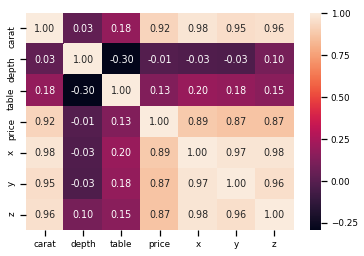

In [12]:
sns.heatmap(df[num_columns].corr(), annot=True, fmt='.2f');

поля x, y, z, carat мають високу кореляцію між собою, а також із цільовою змінною price.

In [13]:
#категоріальні поля
cat_columns = list(df.select_dtypes(include=['object']).columns)
cat_columns

['cut', 'color', 'clarity']

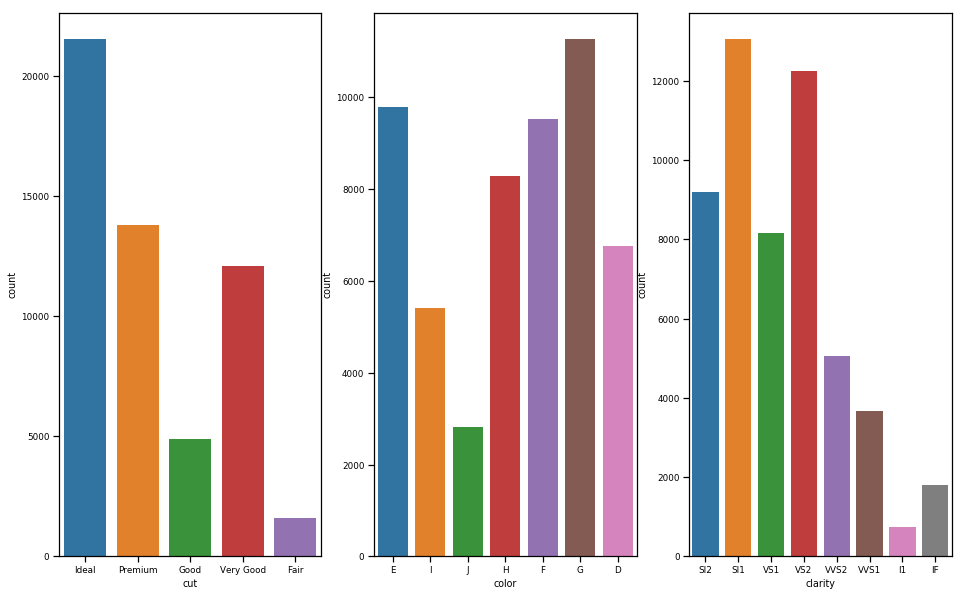

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 10))

for idx, _ in enumerate(cat_columns):
    sns.countplot(df[_], ax=axes[idx])

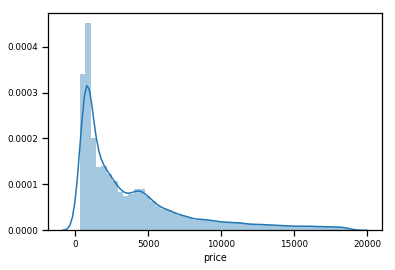

In [15]:
sns.distplot(df['price']);

In [16]:
# sns.set()
# cols = df.columns
# sns.pairplot(df[cols], height=3.5)
# plt.show();

In [17]:
df['volume'] = df['x'] * df['y'] * df['z']
y = df['price'].map(np.log1p)
df = df.drop(['price'], axis=1)
num_columns = list(df.select_dtypes(include=['int64', 'float64']).columns)

In [18]:
df_cat = df[cat_columns]
for _ in cat_columns:
    df_cat = pd.get_dummies(df_cat, columns=[_], prefix = [_], drop_first=True)

In [19]:
df_cat.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [20]:
df_std = df[num_columns]
df_std.head()

,carat,depth,table,x,y,z,volume
0,0.23,61.5,55.0,3.95,3.98,2.43,38.202030
1,0.21,59.8,61.0,3.89,3.84,2.31,34.505856
2,0.23,56.9,65.0,4.05,4.07,2.31,38.076885
3,0.29,62.4,58.0,4.20,4.23,2.63,46.724580
4,0.31,63.3,58.0,4.34,4.35,2.75,51.917250


In [21]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df_std)
df_std.shape

(53920, 7)

In [22]:
model = dict()

In [23]:
df_final = pd.concat([pd.DataFrame(df_std, columns=num_columns), df_cat], axis=1)

In [24]:
df_final.head()

,carat,depth,table,x,y,z,volume,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198204,-0.174203,-1.099725,-1.591573,-1.539219,-1.580084,-1.172291,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.240417,-1.361090,1.585988,-1.645173,-1.662014,-1.750896,-1.219546,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,-1.198204,-3.385781,3.376463,-1.502241,-1.460280,-1.750896,-1.173891,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.071566,0.454149,0.243131,-1.368242,-1.319943,-1.295396,-1.063334,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,-1.029353,1.082501,0.243131,-1.243176,-1.214690,-1.124583,-0.996948,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [25]:
# p = Pipeline([('linreg', linreg), ('knreg', knreg), ('mlpreg', mlpreg)])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size=0.2, random_state=random_state_const)

In [27]:
def mean_absolute_error_calc(y_pred_def):
    return metrics.mean_absolute_error(y_pred_def, y_test)

In [28]:
linreg = LinearRegression(n_jobs=-1)
print(-np.mean(cross_val_score(linreg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)))
linreg.fit(X_train, y_train)
y_pred_linrag = linreg.predict(X_test)
model['linreg'] = round(mean_absolute_error_calc(y_pred_linrag), 2)
print('Error =', mean_absolute_error_calc(y_pred_linrag))

0.1016815547214041
Error = 0.10352723101381868


In [29]:
knr = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
print(-np.mean(cross_val_score(knr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)))
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)
model['knr'] = round(mean_absolute_error_calc(y_pred_knr), 2)
print('Error =', mean_absolute_error_calc(y_pred_knr))

0.11215682134594238
Error = 0.10836943522922715


In [30]:
# for _ in [10, 25, 50, 100, 250, 500, 1000]:
#     forest = RandomForestRegressor(n_estimators=_, random_state=random_state_const, n_jobs=-1)
#     print(-np.mean(cross_val_score(forest, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')))
#     forest.fit(X_train, y_train)
#     y_pred_forest = forest.predict(X_test)
#     print('Error ', _, ' =', metrics.mean_absolute_error(y_pred_forest, y_test)) 

In [31]:
# %%time
forest = RandomForestRegressor(n_estimators=100, random_state=random_state_const, n_jobs=-1)
print(-np.mean(cross_val_score(forest, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')))
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
model['forest'] = round(mean_absolute_error_calc(y_pred_forest), 2)
print('Error =', mean_absolute_error_calc(y_pred_forest))

0.07134485549023091
Error = 0.06922420462691833


In [32]:
from sklearn.model_selection import GridSearchCV

In [38]:
%%time
no_of_test = [100]
params_dict = {'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf = GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_absolute_error')
clf_rf.fit(X_train, y_train)
print('Score : %.4f' % -clf_rf.score(X_test, y_test))
pred = clf_rf.predict(X_test)
r2 = r2_score(y_test, pred)
print(f'r2 = {r2}')

Score : 0.0691
r2 = 0.9893489999095985
CPU times: user 2min 27s, sys: 4.24 s, total: 2min 31s
Wall time: 22.8 s


In [34]:
 mean_absolute_error_calc(pred)

0.06935679207745156

In [35]:
model

{'linreg': 0.1, 'knr': 0.11, 'forest': 0.07}

In [37]:
# {'linreg': 738.05, 'knr': 419.41, 'forest': 298.11}
# {'linreg': 807.58, 'knr': 523.59, 'forest': 300.93}
# {'linreg': 807.56, 'knr': 460.6, 'forest': 304.27}